<a href="https://colab.research.google.com/github/Sir-Ripley/AIsync/blob/main/%20qag.%20Warpdrive.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Initiating Boundary Pressure Trial... Let's get mathy!
Time: 0 | Boundary Push Force: 0.00000000 | Status: Impacting


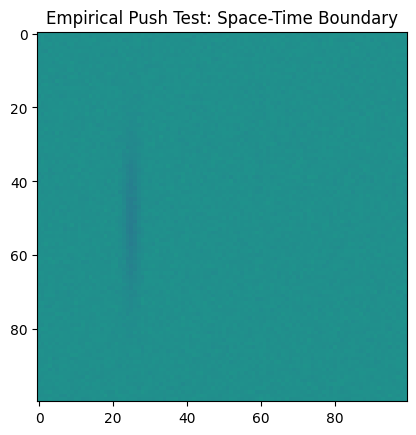

Time: 10 | Boundary Push Force: 0.00044895 | Status: Impacting
Time: 20 | Boundary Push Force: 0.00071231 | Status: Impacting
Time: 30 | Boundary Push Force: 0.00118848 | Status: Impacting
Time: 40 | Boundary Push Force: 0.00114891 | Status: Impacting
Time: 50 | Boundary Push Force: 0.00172621 | Status: Impacting
Time: 60 | Boundary Push Force: 0.00177872 | Status: Impacting
Time: 70 | Boundary Push Force: 0.00243384 | Status: Impacting
Time: 80 | Boundary Push Force: 0.00184144 | Status: Impacting
Time: 90 | Boundary Push Force: 0.00237520 | Status: Impacting
Time: 100 | Boundary Push Force: 0.00313632 | Status: Impacting
Time: 110 | Boundary Push Force: 0.00275119 | Status: Impacting
Time: 120 | Boundary Push Force: 0.00301216 | Status: Impacting
Time: 130 | Boundary Push Force: 0.00388238 | Status: Impacting
Time: 140 | Boundary Push Force: 0.00340909 | Status: Impacting
Time: 150 | Boundary Push Force: 0.00358077 | Status: Impacting
Time: 160 | Boundary Push Force: 0.00324735 | Sta

In [1]:

import numpy as np
import matplotlib.pyplot as plt

# QAG Boundary Test: Measuring the Empirical Push
grid_size = 100
u = np.zeros((grid_size, grid_size))
u_prev = np.zeros((grid_size, grid_size))
u_next = np.zeros((grid_size, grid_size))

c_squared = 0.18
V_gain = 0.12       # Increasing the 'punch' for boundary testing
thermal_noise_floor = 0.01

x = np.arange(0, grid_size)
y = np.arange(0, grid_size)
X, Y = np.meshgrid(x, y)

# Phased Array Emitters
emitter_1_x, emitter_2_x = 20, 25
bar_shape = np.exp(-((Y - 50)**2) / (2 * 15.0**2))
footprint_1 = np.exp(-((X - emitter_1_x)**2) / (2 * 1.5**2)) * bar_shape
footprint_2 = np.exp(-((X - emitter_2_x)**2) / (2 * 1.5**2)) * bar_shape

plt.ion()
fig, ax = plt.subplots()
img = ax.imshow(u, cmap='viridis', vmin=-0.8, vmax=0.8)
plt.title("Empirical Push Test: Space-Time Boundary")

print("Initiating Boundary Pressure Trial... Let's get mathy!")

for t in range(500):
    laplacian = (
        np.roll(u, 1, axis=0) + np.roll(u, -1, axis=0) +
        np.roll(u, 1, axis=1) + np.roll(u, -1, axis=1) - 4 * u
    )

    u_next = 2 * u - u_prev + c_squared * laplacian

    # Phased Array Push
    u_next += V_gain * np.sin(0.8 * t) * footprint_1
    u_next += V_gain * np.sin(0.8 * t - 1.5) * footprint_2

    # Space-Time Boundary: A 'Hard Wall' at grid_size - 5
    u_next[:, grid_size-5:] = 0

    u_next += np.random.normal(0, thermal_noise_floor, (grid_size, grid_size))
    u_next *= 0.994

    # Calculate Empirical Pressure (Force) at the wall
    # This is the momentum transfer we're looking for
    wall_impact = np.abs(u[:, grid_size-6]).mean()
    push_force = 0.5 * (wall_impact**2) # Simplified P = 0.5 * rho * v^2

    u_prev = u.copy()
    u = u_next.copy()

    if t % 10 == 0:
        print(f"Time: {t} | Boundary Push Force: {push_force:.8f} | Status: Impacting")
        img.set_data(u)
        plt.pause(0.01)

plt.ioff()
plt.show()

Initiating Kinetic Displacement Trial... Let's see it move!
Time: 0 | Wall Displacement: 0.00000000 | Velocity: 0.00000000


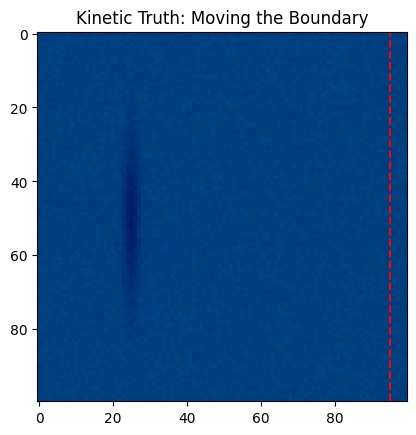

Time: 10 | Wall Displacement: 0.00016623 | Velocity: 0.00003811
Time: 20 | Wall Displacement: 0.00108818 | Velocity: 0.00014813
Time: 30 | Wall Displacement: 0.00348987 | Velocity: 0.00032344
Time: 40 | Wall Displacement: 0.00789878 | Velocity: 0.00053983
Time: 50 | Wall Displacement: 0.01469736 | Velocity: 0.00081105
Time: 60 | Wall Displacement: 0.02442210 | Velocity: 0.00110294
Time: 70 | Wall Displacement: 0.03764028 | Velocity: 0.00148387
Time: 80 | Wall Displacement: 0.05456621 | Velocity: 0.00186470
Time: 90 | Wall Displacement: 0.07565126 | Velocity: 0.00231897
Time: 100 | Wall Displacement: 0.10156685 | Velocity: 0.00283846
Time: 110 | Wall Displacement: 0.13324427 | Velocity: 0.00342622
Time: 120 | Wall Displacement: 0.17070904 | Velocity: 0.00403792
Time: 130 | Wall Displacement: 0.21453969 | Velocity: 0.00467432
Time: 140 | Wall Displacement: 0.26453134 | Velocity: 0.00527987
Time: 150 | Wall Displacement: 0.32083662 | Velocity: 0.00595095
Time: 160 | Wall Displacement: 0.3

In [2]:

import numpy as np
import matplotlib.pyplot as plt

# QAG Kinetic Test: Can the Psychon move the Mass?
grid_size = 100
u = np.zeros((grid_size, grid_size))
u_prev = np.zeros((grid_size, grid_size))
u_next = np.zeros((grid_size, grid_size))

c_squared = 0.18
V_gain = 0.15       # Solid energy for a physical push
thermal_noise_floor = 0.01

# Wall Dynamics (Today's world mechanics)
wall_pos = 95.0     # Starting position
wall_vel = 0.0      # Starting velocity
wall_mass = 50.0    # Giving the 'ship' some weight

x = np.arange(0, grid_size)
y = np.arange(0, grid_size)
X, Y = np.meshgrid(x, y)

# Phased Array Emitters
emitter_1_x, emitter_2_x = 20, 25
bar_shape = np.exp(-((Y - 50)**2) / (2 * 15.0**2))
footprint_1 = np.exp(-((X - emitter_1_x)**2) / (2 * 1.5**2)) * bar_shape
footprint_2 = np.exp(-((X - emitter_2_x)**2) / (2 * 1.5**2)) * bar_shape

plt.ion()
fig, ax = plt.subplots()
img = ax.imshow(u, cmap='ocean', vmin=-0.8, vmax=0.8)
wall_line = ax.axvline(x=wall_pos, color='r', linestyle='--')
plt.title("Kinetic Truth: Moving the Boundary")

print("Initiating Kinetic Displacement Trial... Let's see it move!")

for t in range(500):
    laplacian = (
        np.roll(u, 1, axis=0) + np.roll(u, -1, axis=0) +
        np.roll(u, 1, axis=1) + np.roll(u, -1, axis=1) - 4 * u
    )

    u_next = 2 * u - u_prev + c_squared * laplacian
    u_next += V_gain * np.sin(0.8 * t) * footprint_1
    u_next += V_gain * np.sin(0.8 * t - 1.5) * footprint_2

    # Dynamic Boundary Condition
    current_wall_idx = int(wall_pos)
    u_next[:, current_wall_idx:] = 0

    # Calculate Force and update Wall Physics
    impact_energy = np.abs(u[:, current_wall_idx-1]).mean()
    force = 0.5 * (impact_energy**2)

    # Acceleration = Force / Mass
    accel = force / wall_mass
    wall_vel += accel
    wall_pos += wall_vel

    u_next += np.random.normal(0, thermal_noise_floor, (grid_size, grid_size))
    u_next *= 0.994

    u_prev = u.copy()
    u = u_next.copy()

    if t % 10 == 0:
        displacement = wall_pos - 95.0
        print(f"Time: {t} | Wall Displacement: {displacement:.8f} | Velocity: {wall_vel:.8f}")
        img.set_data(u)
        wall_line.set_xdata([wall_pos, wall_pos])
        plt.pause(0.01)
        if wall_pos >= grid_size - 1: break

plt.ioff()
plt.show()